# Лабораторна робота №1

#### Тема: Аналіз одновимірного часового ряду

#### Виконали студенти груп КА-21 та КА-24 Акименко Валерія, Герман Вікторія, Жигалов Олександр, Людоговська Анна.

#### _Імпорт бібліотек_

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### _Завдання 1_

Обраний часовий ряд: https://www.kaggle.com/datasets/rakannimer/air-passengers

Період спостережень: Січень 1949 - Грудень 1960

Кількість значень: 144 спостереження

Одиниці вимірювання: Тисячі пасажирів ($10^3$)

Типи стовпців: Month (datetime), Passengers (int64)

#### _Завдання 2_

In [31]:
df = pd.read_csv('dataset/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Мінімальне значення - 1949-11 104

Максимальне значення - 1960-07 622

Середнє значення - 280.3

Медіана - 265.5

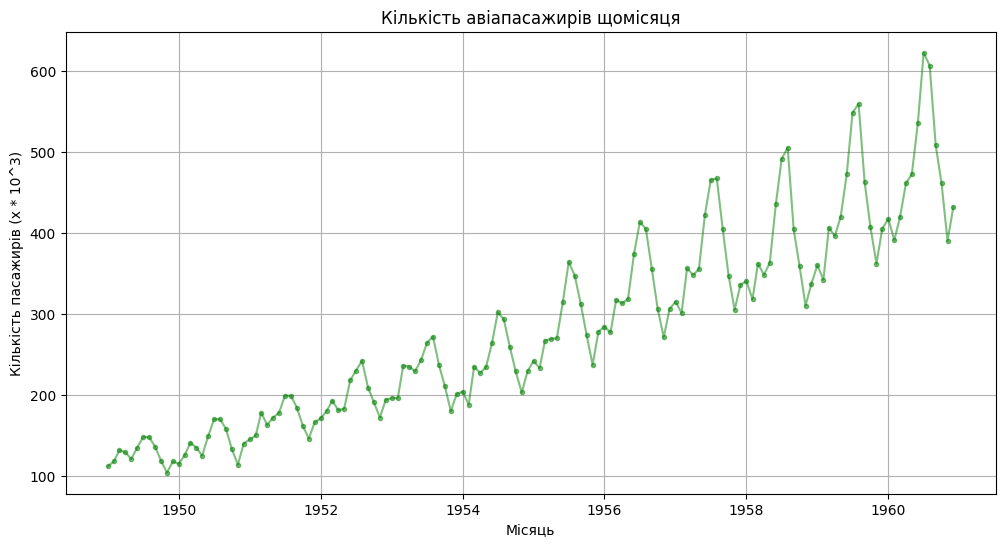

In [32]:
df['Month'] = pd.to_datetime(df['Month'])

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'], marker='.', linestyle='-', color='g', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

На графіку чітко видно стійкий тренд протягом усього періоду (1949–1960), що свідчить про загальне зростання обсягів авіаперевезень.

Спостерігаються повторювані сезонні коливання з піками влітку та спадами в осінньо-зимовий період.

Також можна побачити, що розмах сезонних коливань зростає разом із трендом.

У висновку, можна сказати, що ряд має висхідний тренд та певну сезонність

#### _Завдання 3_

Обраний ряд не має пропусків, тому вони будуть створені штучно (15% від розміру датасету)

In [33]:
if os.path.exists('dataset/AirPassengers_with_gaps.csv'):
    n_missing = int(len(df) * 0.15)

    np.random.seed(42)
    missing_indices = np.random.choice(df.index, n_missing, replace=False)

    df_with_gaps = df.copy()
    df_with_gaps.loc[missing_indices, '#Passengers'] = np.nan

    df_with_gaps.to_csv('dataset/AirPassengers_with_gaps.csv', index=False)
else:
    df_with_gaps = pd.read_csv('dataset/AirPassengers.csv')

In [34]:
df_with_gaps

,Month,#Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


Кількість значень - 144

Пропусків - 21
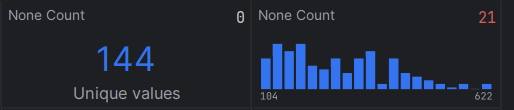

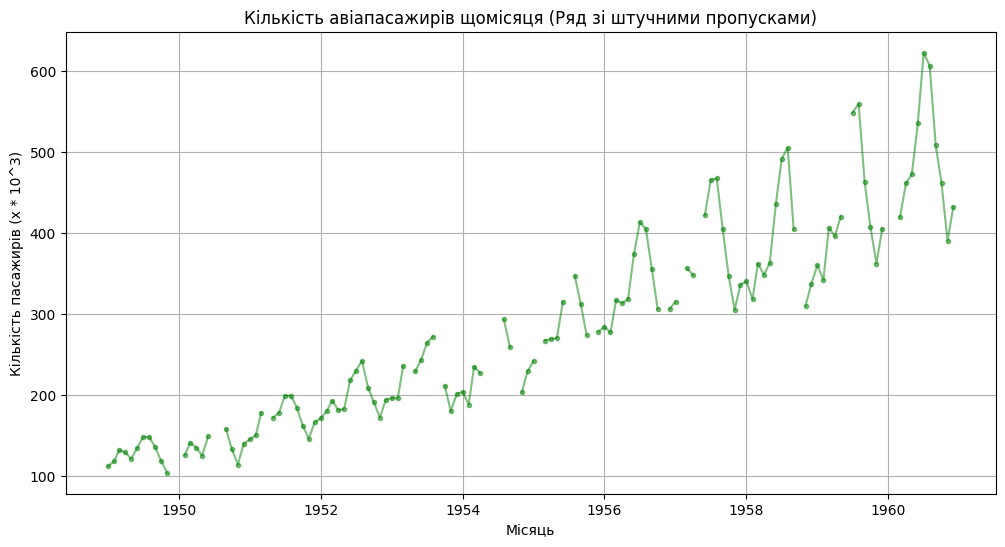

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df_with_gaps['Month'], df_with_gaps['#Passengers'], marker='.', linestyle='-', color='g', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі штучними пропусками)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Метод 1: Лінійна інтерполяція

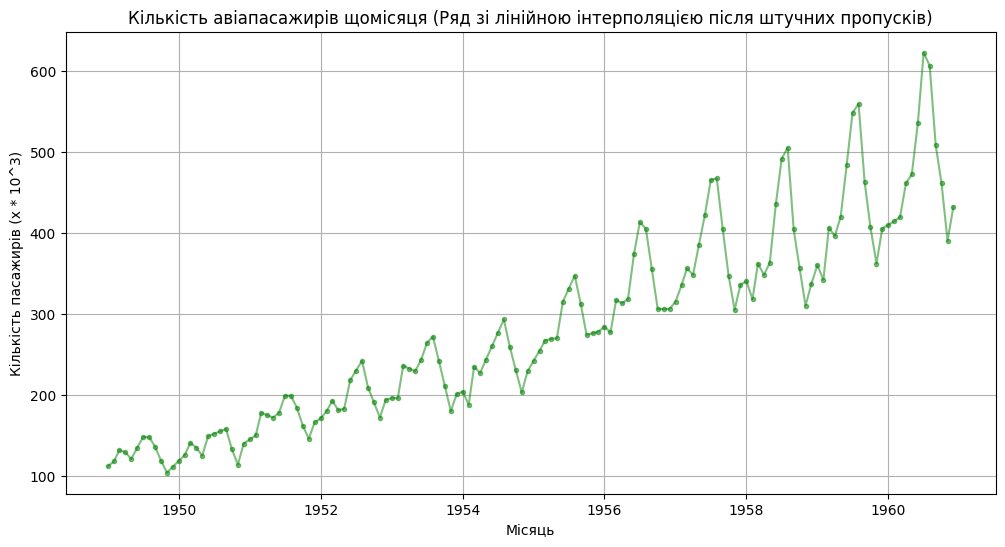

In [36]:
df_interpolated = df_with_gaps.copy()
df_interpolated['#Passengers'] = df_interpolated['#Passengers'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
plt.plot(df_interpolated['Month'], df_interpolated['#Passengers'], marker='.', linestyle='-', color='r', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі лінійною інтерполяцією після штучних пропусків)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Метод 2: Попереднє спостереження

C:\Users\Zhyhalov\AppData\Local\Temp\ipykernel_13148\3890524130.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


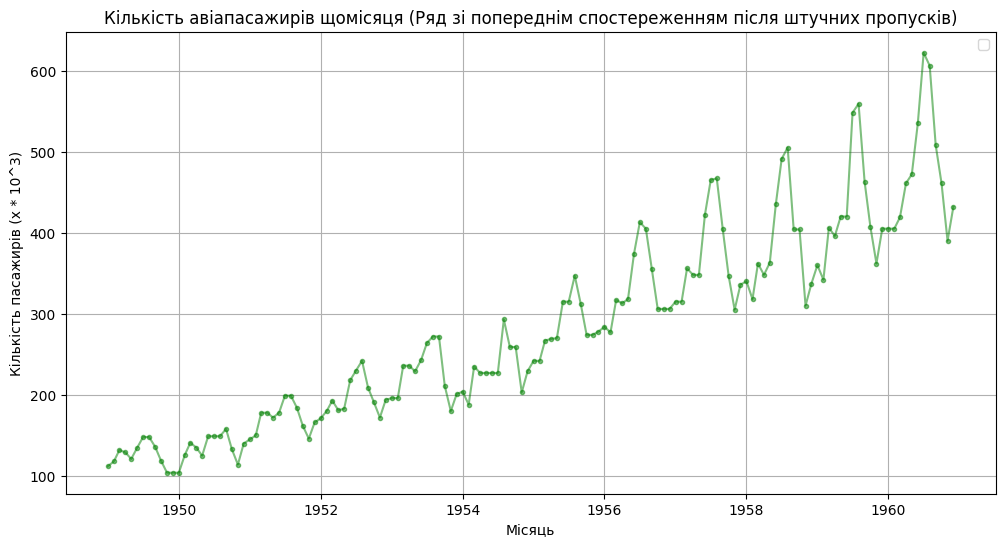

In [37]:
df_ffill = df_with_gaps.copy()
df_ffill['#Passengers'] = df_ffill['#Passengers'].ffill()

plt.figure(figsize=(12, 6))
plt.plot(df_ffill['Month'], df_ffill['#Passengers'], marker='.', linestyle='-', color='b', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі попереднім спостереженням після штучних пропусків)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Порівняння оригінального та заповнених рядів

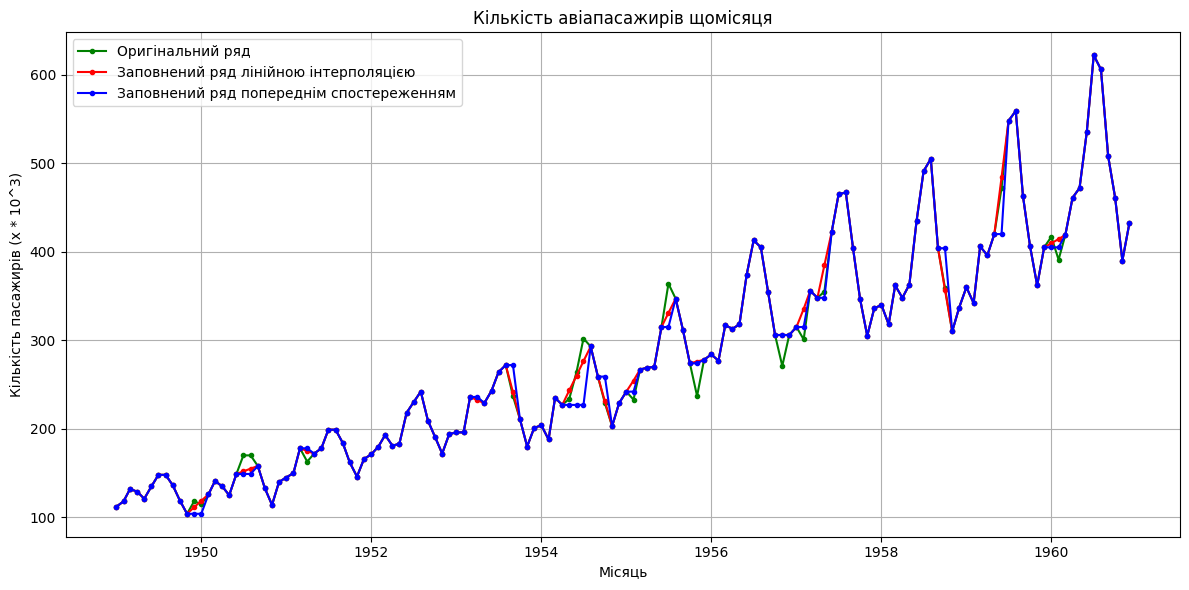

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'], label='Оригінальний ряд', marker='.', linestyle='-', color='g', alpha=1)
plt.plot(df_interpolated['Month'], df_interpolated['#Passengers'], label='Заповнений ряд лінійною інтерполяцією', marker='.', linestyle='-', color='r', alpha=1)
plt.plot(df_ffill['Month'], df_ffill['#Passengers'], label='Заповнений ряд попереднім спостереженням', marker='.', linestyle='-', color='b', alpha=1)

plt.title('Кількість авіапасажирів щомісяця')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [56]:
df_union = pd.concat([df, df_interpolated['#Passengers'].rename('Interpolated Passengers'), df_ffill['#Passengers'].rename('Forward Fill Passengers')], axis=1)
df_union

,Month,#Passengers,Interpolated Passengers,Forward Fill Passengers
0,1949-01-01,112,112.0,112.0
1,1949-02-01,118,118.0,118.0
2,1949-03-01,132,132.0,132.0
3,1949-04-01,129,129.0,129.0
4,1949-05-01,121,121.0,121.0
...,...,...,...,...
139,1960-08-01,606,606.0,606.0
140,1960-09-01,508,508.0,508.0
141,1960-10-01,461,461.0,461.0
142,1960-11-01,390,390.0,390.0


#### _Завдання 4_

#### _Завдання 5_

#### _Завдання 6_

#### _Завдання 7_